> Image Patches [8 pts] A patch is a small piece of an image. Sometimes we will focus on the patches of an image instead of operating on the entire image itself.
1. (5 pts) Take the image 'grace hopper.png', load it as grayscale, and divide the image into 16 by 16 pixel image patches. Normalize each patch to have zero mean and unit variance. Complete the function 'image_patches' in 'filters.py'. Plot three of the 16x16 image patches in your report.

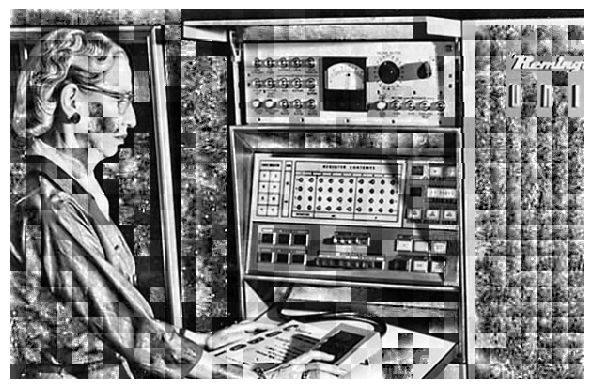

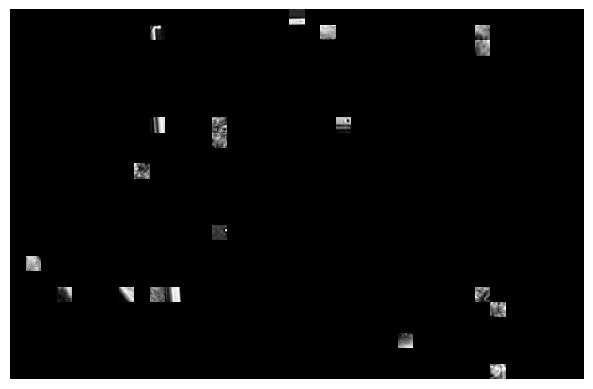

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import random

img_gray = cv2.imread('../hw2_files/grace_hopper.png', cv2.IMREAD_GRAYSCALE)

# Get the size information of image
H, W = img_gray.shape
# print(img_gray.shape)   # (389, 600)

# resize the img to let them could be divided by 16 for row and col
H_new, W_new = H - (H % 16), W - (W % 16)
img_gray = cv2.resize(img_gray, (W_new, H_new))

# init a list
patch_lst = []

# segment && normalization
for i in range(0, img_gray.shape[0], 16):
    for j in range(0, img_gray.shape[1], 16):
        # divide the image into 16x16 pixel patches
        patch_tmp = img_gray[i:i+16, j:j+16]

        # normalization
        patch_mean  = np.mean(patch_tmp)
        patch_std   = np.std(patch_tmp)
        normalized_patch = (patch_tmp - patch_mean) / patch_std

        patch_lst.append(normalized_patch)

# 计算图像切片的行列数
num_rows = img_gray.shape[0] // 16
num_cols = img_gray.shape[1] // 16

# 创建紧凑的网格进行可视化，修正figsize的行列比例
scale_num = 0.2
fig, axs = plt.subplots(
    num_rows, 
    num_cols, 
    figsize=(num_cols * scale_num, num_rows * scale_num), 
    gridspec_kw={'wspace': 0, 'hspace': 0}
)

# 移除网格间隙，并可视化所有切片
for i in range(num_rows):
    for j in range(num_cols):
        axs[i, j].imshow(patch_lst[i * num_cols + j], cmap='gray')
        axs[i, j].axis('off')  # 移除轴

plt.subplots_adjust(wspace=0, hspace=0)  # remove the gap while visualizing
plt.show()

##
random_indices = random.sample(range(num_rows * num_cols), 20)

fig, axs = plt.subplots(
    num_rows, 
    num_cols, 
    figsize=(num_cols * scale_num, num_rows * scale_num), 
    gridspec_kw={'wspace': 0, 'hspace': 0}
)
blank_image = np.ones((16, 16)) * 255  # 用255表示空白（白色）


# 移除网格间隙，并可视化所有切片
for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        if idx in random_indices:
            # 显示随机选择的图像切片
            axs[i, j].imshow(patch_lst[idx], cmap='gray')
        else:
            # 显示空白图像
            axs[i, j].imshow(blank_image, cmap='gray')
        axs[i, j].axis('off')  # 移除轴

# 进一步移除网格间隙
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()


> (3 pts) Early work in computer vision used unique images patches as descriptors or features of images
for applications ranging from image alignment and stitching to object classification and detection.
Inspect the patches extracted in the previous question, and discuss, in a few sentences, why they
would be good or bad descriptors. Consider how those patches would look like if we changed the
object’s pose, scale, illumination, etc.

Pros:

1. since this method is easy to implement and runs fast, it is practical for uncomplicated tasks;
2. each patch describes the grayscale value characteristics of a part of the region, so if two images have overlapping regions, the image stitching task can be performed by calculating the distance;

Disadvantages:

1. lack of scale robustness: if the distance of an object in two images changes, then each patch of this descriptor will change significantly;
2. lack of rotational robustness: as described above, since it is a fixed-size window, when the target pose in the patch changes, the patch will not be correctly aligned with the new object pose;
3. poorly defined window size: it requires multiple rounds of testing before a more appropriate window size may be selected, however, a fixed window size may not be able to accommodate multiple situations at the same time in a single image;


Gaussian Filter [16 pts] 
> A Gaussian filter is a filter whose impulse response is a Gaussian function. Here we only talk about the discrete kernel and assume 2D Gaussian distribution is circularly symmetric.